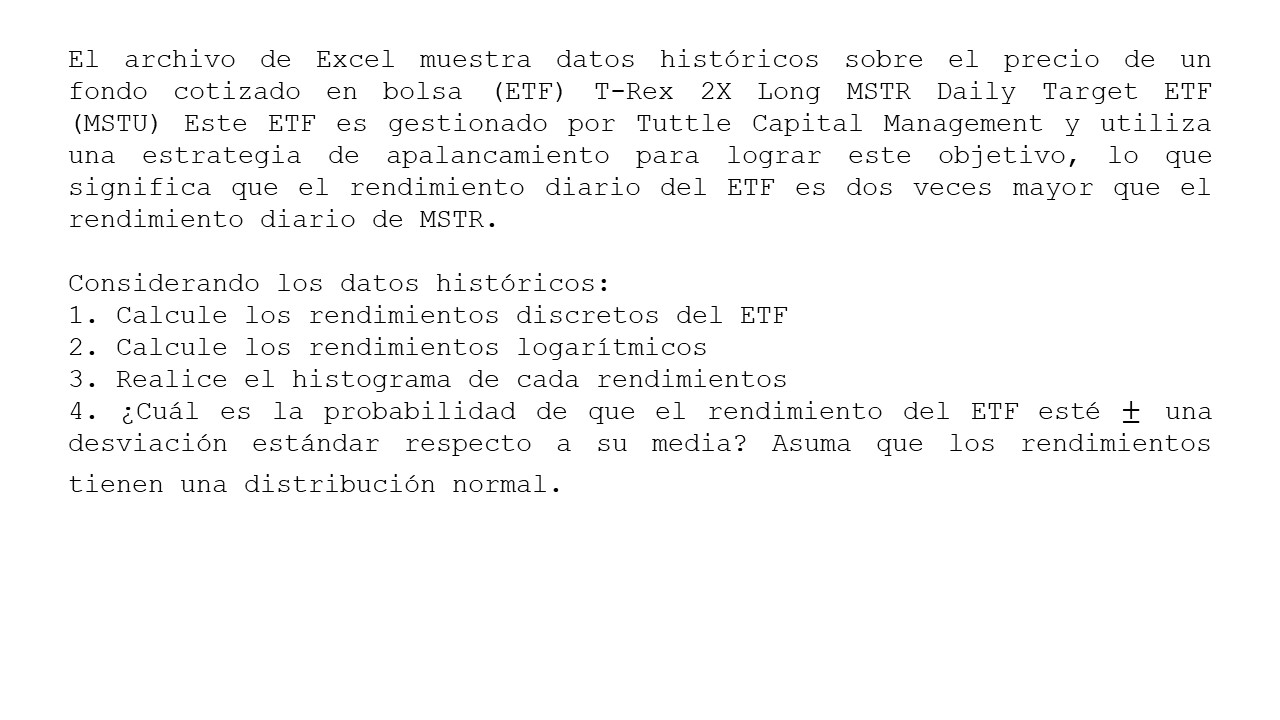

Los fondos cotizados en bolsa (ETF) apalancados son instrumentos financieros diseñados para amplificar los rendimientos diarios de un activo subyacente. En este caso, el T-Rex 2X Long MSTR Daily Target ETF (MSTU), gestionado por Tuttle Capital Management, busca duplicar el rendimiento diario de MSTR mediante el uso de apalancamiento. Esto significa que, si MSTR sube un 1% en un día, el ETF apalancado debería subir aproximadamente un 2%, y viceversa en caso de caídas. Pero, ¿cómo se comportan estos rendimientos amplificados a lo largo del tiempo? Y más importante: ¿qué probabilidad hay de que los rendimientos se mantengan dentro de un rango "esperado"?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Cargar y procesar datos
df = pd.read_excel("Ejercicio de Distribución normal.xlsx", sheet_name="datos históricos")
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%b %d, %Y")
df = df.sort_values("Fecha").reset_index(drop=True)

In [3]:
# Calcular rendimientos
df["Rendimiento Discreto"] = df["Precio"].pct_change() * 2  # Factor 2X por el apalancamiento
df["Rendimiento Logarítmico"] = np.log(df["Precio"] / df["Precio"].shift(1)) * 2  # Ajustado al 2X
df = df.dropna()

**1. Rendimientos Discretos:**

Son los cambios porcentuales simples entre el precio de un día y el anterior. Por ejemplo, si el ETF pasa de $100 a $102 en un día, el rendimiento discreto es del 2%. Al estar apalancado 2X, este valor se duplica, resultando en un 4%. Estos rendimientos son intuitivos, pero pueden distorsionarse en series de tiempo largas debido a la composición de ganancias y pérdidas.

**2. Rendimientos Logarítmicos:**
También conocidos como rendimientos continuos, miden el cambio utilizando logaritmos naturales. Esto suaviza las variaciones extremas y facilita el análisis estadístico. Estos rendimientos son aditivos en el tiempo, lo que los hace ideales para modelar comportamientos a largo plazo.

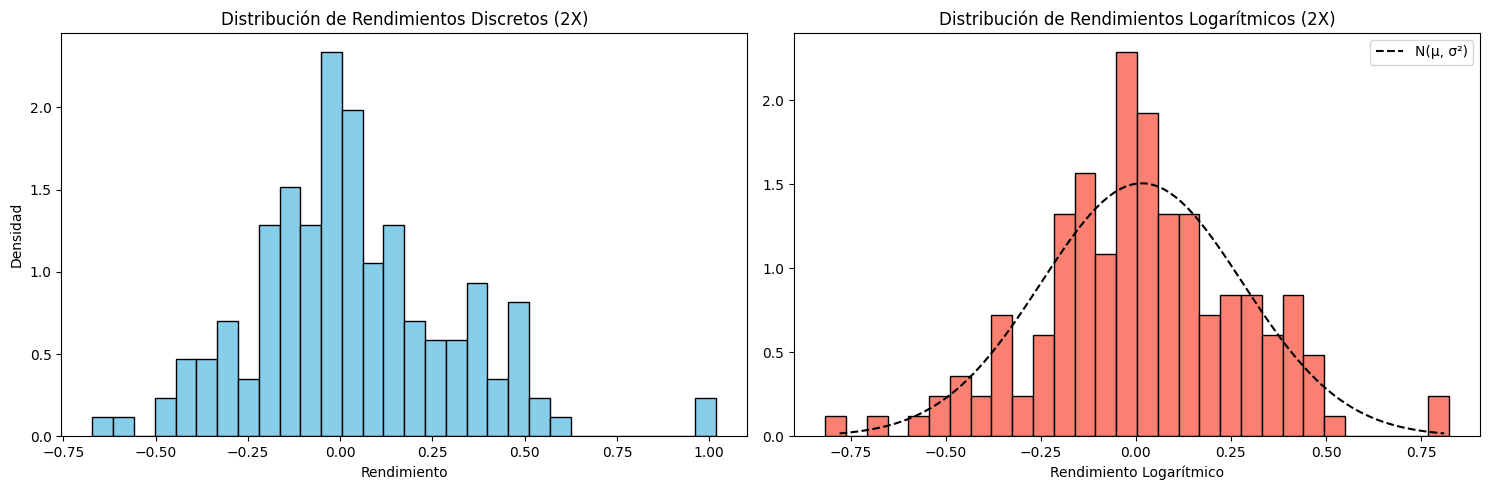

In [4]:
# Histogramas
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Histograma rendimientos discretos
ax[0].hist(
    df["Rendimiento Discreto"],
    bins=30,
    color="skyblue",
    edgecolor="black",
    density=True
)
ax[0].set_title("Distribución de Rendimientos Discretos (2X)")
ax[0].set_xlabel("Rendimiento")
ax[0].set_ylabel("Densidad")

# Histograma rendimientos logarítmicos
ax[1].hist(
    df["Rendimiento Logarítmico"],
    bins=30,
    color="salmon",
    edgecolor="black",
    density=True
)
ax[1].set_title("Distribución de Rendimientos Logarítmicos (2X)")
ax[1].set_xlabel("Rendimiento Logarítmico")

# Superponer curva normal en rendimientos logarítmicos
mu_log = df["Rendimiento Logarítmico"].mean()
sigma_log = df["Rendimiento Logarítmico"].std()
x = np.linspace(mu_log - 3*sigma_log, mu_log + 3*sigma_log, 100)
ax[1].plot(x, norm.pdf(x, mu_log, sigma_log), "k--", label="N(μ, σ²)")
ax[1].legend()

plt.tight_layout()
plt.show()

Al graficar los rendimientos en histogramas, observamos cómo se distribuyen:

**1. Rendimientos Discretos:** Suelen mostrar una distribución asimétrica, con colas más largas hacia los extremos (muchos días con ganancias o pérdidas moderadas y algunos días con movimientos bruscos). Esto refleja la naturaleza volátil de los ETFs apalancados.

**2. Rendimientos Logarítmicos:** Tienden a aproximarse a una distribución normal (forma de campana), especialmente si se asume que los mercados se comportan de manera eficiente. En este caso, la curva normal se superpone al histograma para comparar cómo se ajustan los datos reales al modelo teórico.

In [5]:
# Cálculo de probabilidad ±1σ
probabilidad = norm.cdf(mu_log + sigma_log, loc=mu_log, scale=sigma_log) - norm.cdf(mu_log - sigma_log, loc=mu_log, scale=sigma_log)

# Resultados numéricos
print("---- Resultados clave ----")
print(f"Media (μ): {mu_log:.4f}")
print(f"Desviación Estándar (σ): {sigma_log:.4f}")
print(f"Probabilidad dentro de ±1σ: {probabilidad * 100:.2f}%")

---- Resultados clave ----
Media (μ): 0.0156
Desviación Estándar (σ): 0.2651
Probabilidad dentro de ±1σ: 68.27%


El resultado obtenido ($≈68.27\%$ de probabilidad de que los rendimientos del ETF estén dentro de ±1 desviación estándar de la media) coincide casi exactamente con la regla empírica, que describe cómo se distribuyen los datos en una curva normal. Esta coincidencia sugiere dos conclusiones clave:

1. Los rendimientos logarítmicos del ETF se comportan, en términos generales, como una distribución normal durante el período analizado. Esto implica que:

*   La mayoría de los rendimientos (68%) se agrupan cerca de la media (μ), lo que indica cierta estabilidad en el corto plazo.

*   Los eventos extremos (fuera de ±1σ) son menos frecuentes, al menos en los datos históricos proporcionados.


2. Aunque el ETF utiliza apalancamiento 2X, que amplifica tanto ganancias como pérdidas, la distribución de los rendimientos logarítmicos sigue ajustándose a la normalidad en este análisis. Esto podría deberse a que:

*   Los datos históricos no incluyen eventos extremos significativos (como crisis financieras).
*   El apalancamiento afecta la magnitud de los rendimientos, pero no necesariamente su distribución estadística, siempre que los movimientos del activo subyacente (MSTR) sean estables.